In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
from sklearn.linear_model import Ridge, RidgeCV

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
mat_x = pd.read_pickle('./mat_x.pkl')

In [8]:
vec_y = pd.read_pickle('./vec_y.pkl')

In [93]:
vec_y.apply([min, max])

min     135000000
max    1000000000
Name: قیمت کل, dtype: int64

In [95]:
mat_x[vec_y == 135000000]

,ناحیه,متراژ,ساخت,اتاق,آسانسور,پارکینگ,انباری,تعداد واحد در طبقه,سند,جهت ساختمان,وضعیت واحد,بالکن,ایرانی,فرنگی,سرمایش,گرمایش,تأمین‌کننده آب گرم,جنس کف,طبقه واحد,کل طبقات
24,شهریار,40,1387,1,False,False,True,۱,قول‌نامه‌ای,شمالی,بازسازی شده,True,True,True,کولر آبی,بخاری,آبگرم‌کن,سرامیک,-1,4


In [63]:
mat_x.shape

(2334, 20)

In [64]:
vec_y.shape

(2334,)

In [67]:
df = pd.concat([mat_x, vec_y], axis=1)

In [14]:
mat_x.dtypes

ناحیه                  category
متراژ                     int32
ساخت                      int64
اتاق                      int32
آسانسور                    bool
پارکینگ                    bool
انباری                     bool
تعداد واحد در طبقه     category
سند                    category
جهت ساختمان            category
وضعیت واحد             category
بالکن                      bool
ایرانی                     bool
فرنگی                      bool
سرمایش                 category
گرمایش                 category
تأمین‌کننده آب گرم    category
جنس کف                 category
طبقه واحد                 int64
کل طبقات                  int64
dtype: object

In [11]:
mat_x.head(2)

,ناحیه,متراژ,ساخت,اتاق,آسانسور,پارکینگ,انباری,تعداد واحد در طبقه,سند,جهت ساختمان,وضعیت واحد,بالکن,ایرانی,فرنگی,سرمایش,گرمایش,تأمین‌کننده آب گرم,جنس کف,طبقه واحد,کل طبقات
1,قرچک,52,1384,1,False,False,True,۴,تک‌برگ,شمالی,بازسازی شده,True,True,True,کولر آبی,بخاری,آبگرم‌کن,سرامیک,2,4
5,قرچک,52,1385,1,False,True,False,۴,سایر,جنوبی,بازسازی شده,True,True,True,کولر آبی,بخاری,آبگرم‌کن,سرامیک,3,3


In [19]:
mat_x_vector = pd.get_dummies(mat_x)

In [20]:
x_tran, x_test, y_train, y_test = train_test_split(mat_x_vector, vec_y)

In [21]:
x_tran.dtypes

متراژ                 int32
ساخت                  int64
اتاق                  int32
آسانسور                bool
پارکینگ                bool
                      ...  
جنس کف_موزائیک        uint8
جنس کف_موکت           uint8
جنس کف_پارکت لمینت    uint8
جنس کف_پارکت چوب      uint8
جنس کف_کف‌پوش PVC     uint8
Length: 297, dtype: object

In [22]:
model = Ridge(alpha=0.1, normalize=True).fit(x_tran, y_train)

In [23]:
model.score(x_tran, y_train)

0.6597632298656542

In [24]:
model.score(x_test, y_test)

0.5430837269179452

In [25]:
y_predict_train = model.predict(x_tran)

<AxesSubplot:xlabel='قیمت کل'>

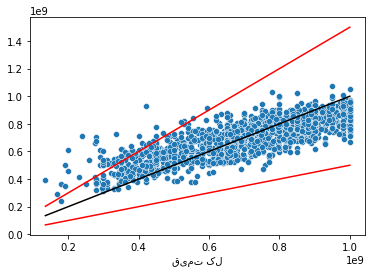

In [29]:
sns.scatterplot(x=y_train, y=y_predict_train)
point = np.array([y_train.min(), y_train.max()])
sns.lineplot(x=point, y=point, color='k')
prsnt = 0.5
sns.lineplot(x=point, y=point * ( 1 + prsnt), color='r')
sns.lineplot(x=point, y=point * ( 1 - prsnt), color='r')

In [30]:
error = y_predict_train - y_train

<AxesSubplot:ylabel='Frequency'>

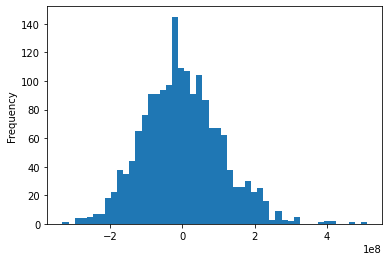

In [34]:
error.plot(kind='hist', bins=50)

In [58]:
model2 = Ridge(alpha=0.5, normalize=True).fit(x_tran, y_train)

In [59]:
model2.score(x_tran, y_train)

0.5694201612297973

In [60]:
model2.score(x_test, y_test)

0.49083178203835753

In [61]:
y_predict2_train = model2.predict(x_tran)

<AxesSubplot:xlabel='قیمت کل'>

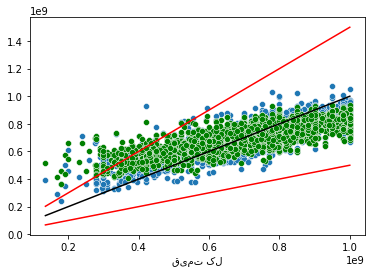

In [62]:
sns.scatterplot(x=y_train, y=y_predict_train)
sns.scatterplot(x=y_train, y=y_predict2_train, color='g')
point = np.array([y_train.min(), y_train.max()])
sns.lineplot(x=point, y=point, color='k')
prsnt = 0.5
sns.lineplot(x=point, y=point * ( 1 + prsnt), color='r')
sns.lineplot(x=point, y=point * ( 1 - prsnt), color='r')

In [40]:
error2 = y_predict2_train - y_train

<AxesSubplot:ylabel='Frequency'>

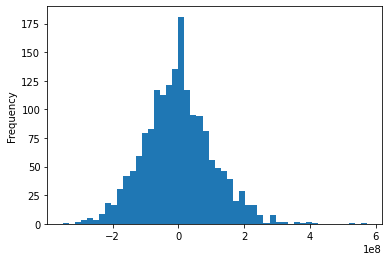

In [41]:
error2.plot(kind='hist', bins=50)

In [89]:
phi_dist = df.groupby('ناحیه').agg({'قیمت کل':np.mean}).dropna()

<AxesSubplot:ylabel='Frequency'>

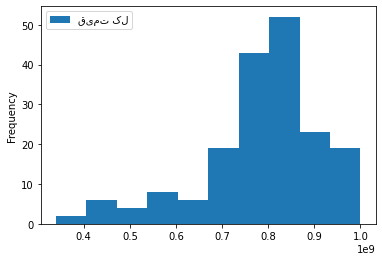

In [92]:
phi_dist.plot(kind='hist', bins=10)

In [114]:
g1 = df[df['ناحیه'] == 'پردیس']
g2 = g1[g1['سند'] == 'تک‌برگ'].drop([
    'جنس کف', 'تأمین‌کننده آب گرم', 'بالکن', 'ایرانی', 'فرنگی', 'آسانسور', 'ناحیه', 'سند',
    'وضعیت واحد', 'گرمایش', 'انباری', 'سرمایش'
],axis=1)
g2

,متراژ,ساخت,اتاق,پارکینگ,تعداد واحد در طبقه,جهت ساختمان,طبقه واحد,کل طبقات,قیمت کل
3109,88,1400,2,True,۴,جنوبی,0,16,595200000
5760,87,1399,2,True,۴,شمالی,1,14,660000000
5875,100,1400,2,True,۲,جنوبی,4,5,770000000
6621,64,1398,1,True,۴,جنوبی,1,14,770000000
6671,82,1397,2,False,۲,غربی,4,4,800000000
7006,88,1399,2,True,۴,شمالی,2,14,750000000
7566,100,1400,2,True,۲,غربی,1,5,780000000
8541,80,1395,2,False,۴,جنوبی,8,9,900000000
9242,97,1399,2,True,۲,جنوبی,4,4,835000000
9519,87,1399,2,True,۴,شمالی,1,14,830000000


<AxesSubplot:xlabel='ساخت', ylabel='قیمت کل'>

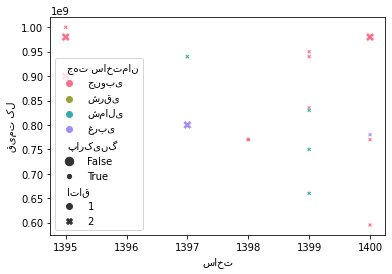

In [117]:
sns.scatterplot(data=g2, x='ساخت', y='قیمت کل', hue='جهت ساختمان', style='اتاق', palette="husl", size='پارکینگ')